# Insect Object Detection

This is an example file of a notebook to train an object detection model. It is based off of Edward Amoah's original assignment 4b code, and modified by Sabrina Adler on 9/15/2025. 

This section is worth **30% of the project**. Please complete all 3 questions to receive full credit

## Setup

### Imports and Installs

You may need to install some VS-Code extensions to use Jupyter Notebook. I recommend installing the Jupyter extension. 

*Note: before you run this notebook, you **MUST** read the PDF explaining how to set up your virtual environment (venv) and install all requirements*

**When running the code cells, go to the left corner of the cell, click run, and select your virtual environment (venv)**

In [1]:
from ultralytics import YOLO
from PIL import Image
import torch
import numpy as np
import os

### Add Your Data Folder

In [2]:
DATA_FOLDER = "../data" # change with the path to your data folder

In [3]:
image_folder = os.path.join(DATA_FOLDER, "train/images")
image_files = os.listdir(image_folder)
yaml_path = os.path.join(DATA_FOLDER, "data.yaml")  

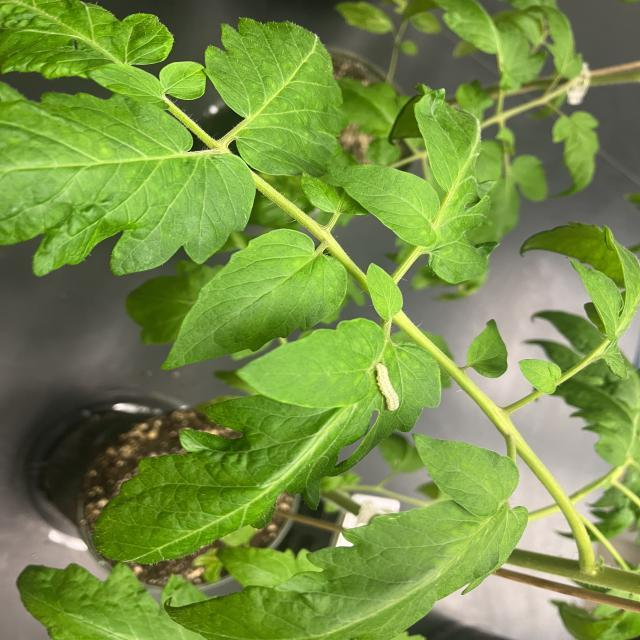

In [4]:
# Example: Load an image from the folder and display it ; Useful check for debugging 
sample_image_path = os.path.join(image_folder, image_files[0])
image = Image.open(sample_image_path)
image.show()

## Assignment 

### Describe the Dataset *(10 pt | 2 Questions)*

In [5]:
## this code is GIVEN, please do not change it ; only alter the parts marked with --student code here -- and -- end student code --

# Function to calculate the percentage of green pixels in an image
def percent_green_pixels(image_path):
    img = Image.open(image_path).convert('RGB')
    img_np = np.array(img)
    # Define green as pixels where G > R and G > B by a margin
    green_mask = (img_np[:,:,1] > img_np[:,:,0] + 30) & (img_np[:,:,1] > img_np[:,:,2] + 30)
    percent_green = 100 * np.sum(green_mask) / green_mask.size
    return percent_green

# Calculate green pixel percentages for all images
green_percents = []
for fname in image_files:
    path = os.path.join(image_folder, fname)
    percent = percent_green_pixels(path)
    green_percents.append(percent)

num_results = 10 # Change this to see more or fewer results
for fname, percent in zip(image_files[:num_results], green_percents[:num_results]):
    print(f"{fname}: {percent:.2f}% green pixels")

IMG_0282_jpeg_jpg.rf.b01ed185c928d54439fb9d7c51fd273e.jpg: 52.42% green pixels
IMG_0283_jpeg_jpg.rf.8335c4a8c855ea8b3e186fc050424fa0.jpg: 19.58% green pixels
IMG_0285_jpeg_jpg.rf.33acd0c32029de095a1db22c8f8e0184.jpg: 35.13% green pixels
IMG_0289_jpeg_jpg.rf.40daf1151579b87947d57ff86b9a251b.jpg: 6.12% green pixels
IMG_0290_jpeg_jpg.rf.b5446319cba5dc1ce54f9f869cda3c70.jpg: 7.18% green pixels
IMG_0291_jpeg_jpg.rf.040272ee8a55e1c16f37bc0036f1aa69.jpg: 36.76% green pixels
IMG_0292_jpeg_jpg.rf.ff966f9ce61dd8d6701409f23fcb5ede.jpg: 36.09% green pixels
IMG_0294_jpeg_jpg.rf.0e97fa01fc4982be55b624b77b8a3db5.jpg: 40.03% green pixels
IMG_0295_jpeg_jpg.rf.d5885d27f284a662b0f22896685ac944.jpg: 8.20% green pixels
IMG_0296_jpeg_jpg.rf.6fe18693c22abd5e31d7d804cf5126c4.jpg: 38.98% green pixels


**QUESTION 1 (5 pt):**

1. Find the average percentage of green pixels across all images in the dataset and print it out
2. Create a histogram of the distribution of green pixel percentages across all images (if you are unsure how to do this look into pandas and matplotlib)

total average: 28.165% green pixels


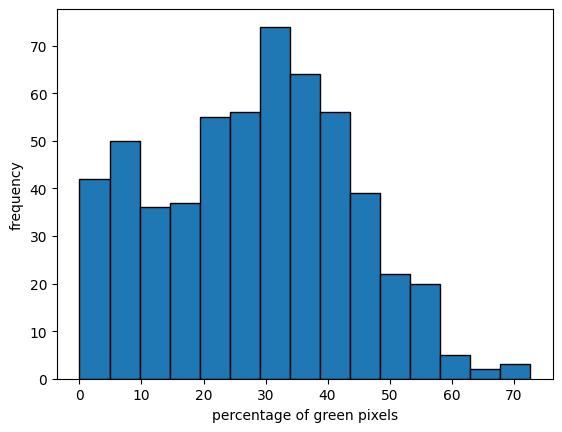

In [6]:
# --student code here --

import matplotlib.pyplot as plt
import numpy as np
print(f"total average: {np.average(green_percents):.3f}% green pixels")

plt.hist(green_percents, bins=15, edgecolor='black') 

plt.xlabel('percentage of green pixels')
plt.ylabel('frequency')
plt.show()
# -- end student code --

**QUESTION 2 (5 pt):** 

Can you describe what this may indicate about the dataset? Do you think it will be hard to identify the greenish cornear worm?

The vast majority of pictures in this dataset contain between 15% and 50% grene pixels in number, which may increase the difficulty to identify the worm, whose image in photos is far smaller than the given percentage.

### Train the Model *(20 pt | 1 Question)*

In [7]:
model = YOLO("yolov8n.pt")  # Load a pre-trained YOLOv8 model

In [8]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

In [9]:
device  = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Fine-Tune the model | no code needs to be changed here
epochs = 10 # change epeochs to 10 or more
model.train(data=yaml_path, epochs=epochs, batch=4, imgsz=480)

New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=480, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

KeyboardInterrupt: 

**QUESTION 3 (10 pt)** \
*Note: maximum 500 words* 

Once this is done training, go to runs/detect and view the confusion matrix as well as some of the other graphs. 
1. How can you interpret this? Would you consider this model successful, yes or no? Explain your reasoning. 
2. Please list your suggestions that you have on how to improve these metrics. 
3. The next part of this project involves incorporating this model into the robot. Do you have any ideas on how to do this successfully? 

1. According to the confusion matrix, the model predicts more false-positives and false-negatives than it does accurate predictions. It is easy to miss an existing worm in an image. According to the curves for loss metrices, the model precision drops significantly after been trained on more than 7, 8 epochs, hinting a possible overfit. I would therefore not consider the current model successful.

2. CLS loss seems redundant in this scenario, as the model only identifies one class of objects.

3. To deploy the model on edge devices, it can be distilled to a smaller version and perform classification on smaller but enhanced images. A simpler solution is to have the edge device serialize the image and calling a server to run the inference.
